#People Detection

**Oleh:**
1.   Najib Rifai 
2.   Farrel Samuel Nicholas



In [2]:
#Connected into drive

from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
#IMPORT LIBRARY
import keras
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import glob 
from PIL import Image
from natsort import natsorted
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.models import load_model

# Mempersiapkan Data Latih dan Data Uji ke Dalam folder Drive 

In [ ]:
#Change PATH
dir = "/content/gdrive/My Drive/Raw_dataset/test/statue/*.jpg"
dataset = []
renamed_dataset = []

for filename in natsorted(glob.glob(dir)):
  print(filename)
  img = Image.open(filename)
  dataset.append(img)


/content/gdrive/My Drive/Raw_dataset/test/statue/Henry_Moore_Arch_Leg_0000.jpg
/content/gdrive/My Drive/Raw_dataset/test/statue/Henry_Moore_Arch_Leg_0001.jpg
/content/gdrive/My Drive/Raw_dataset/test/statue/Henry_Moore_Arch_Leg_0002.jpg
/content/gdrive/My Drive/Raw_dataset/test/statue/Henry_Moore_Arch_Leg_0003.jpg
/content/gdrive/My Drive/Raw_dataset/test/statue/Henry_Moore_Arch_Leg_0004.jpg
/content/gdrive/My Drive/Raw_dataset/test/statue/Henry_Moore_Arch_Leg_0005.jpg
/content/gdrive/My Drive/Raw_dataset/test/statue/Henry_Moore_Arch_Leg_0006.jpg
/content/gdrive/My Drive/Raw_dataset/test/statue/Henry_Moore_Arch_Leg_0008.jpg
/content/gdrive/My Drive/Raw_dataset/test/statue/Henry_Moore_Arch_Leg_0009.jpg
/content/gdrive/My Drive/Raw_dataset/test/statue/Henry_Moore_Arch_Leg_0010.jpg
/content/gdrive/My Drive/Raw_dataset/test/statue/Henry_Moore_Arch_Leg_0011.jpg
/content/gdrive/My Drive/Raw_dataset/test/statue/Henry_Moore_Arch_Leg_0012.jpg
/content/gdrive/My Drive/Raw_dataset/test/statue/Hen

In [ ]:
#resize image to 200 x 200
for image in dataset:
  image = image.resize((200,200))
  resized_dataset.append(image)


In [ ]:
#saving image
j = 1152
for (i, new) in enumerate(dataset):
  new.save('{}{}{}'.format('/content/gdrive/My Drive/resized/test/statue/statue',+j+1,'.jpg'))
  j = j + 1

# Preprocessing Dataset

In [39]:
dir_train = '/content/gdrive/My Drive/resized/train/'
dir_test = '/content/gdrive/My Drive/resized/test/'
# image preprocessing
target_size = (128,128)
classes = 2

train_dataset = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_gen = train_dataset.flow_from_directory(dir_train, target_size=target_size,
                                              shuffle = True,
                                              batch_size = 32,
                                              class_mode='binary')

val_datagen = ImageDataGenerator(rescale = 1./255)
val_gen = val_datagen.flow_from_directory(dir_test, target_size=target_size,
                                            batch_size=32,
                                            class_mode='binary')


Found 1831 images belonging to 2 classes.
Found 457 images belonging to 2 classes.


# Membangun Model CNN sequential

In [40]:
# Membangung model cnn dengan secara sequential
model = Sequential()

# Feature Extraction
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same',
                 strides=2, input_shape=[128,128,3]))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

# FLATTEN
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 8, 8, 64)        

In [ ]:
#model.fit_generator(train_gen, epochs=5, validation_data=val_gen)

# Melatih Model CNN dengan dataset yang sudah disiapkan pada drive

In [42]:
model_cnn = model.fit(x = train_gen, validation_data=val_gen, epochs = 5)

Epoch 1/5
58/58 [==============================] - 12s 198ms/step - loss: 0.6315 - accuracy: 0.6379 - val_loss: 0.5739 - val_accuracy: 0.6827
Epoch 2/5
58/58 [==============================] - 11s 197ms/step - loss: 0.4266 - accuracy: 0.8099 - val_loss: 0.5958 - val_accuracy: 0.6805
Epoch 3/5
58/58 [==============================] - 11s 194ms/step - loss: 0.3648 - accuracy: 0.8542 - val_loss: 0.6051 - val_accuracy: 0.7418
Epoch 4/5
58/58 [==============================] - 11s 192ms/step - loss: 0.3439 - accuracy: 0.8596 - val_loss: 0.5869 - val_accuracy: 0.7418
Epoch 5/5
58/58 [==============================] - 11s 193ms/step - loss: 0.3352 - accuracy: 0.8717 - val_loss: 0.6036 - val_accuracy: 0.7659


In [16]:
model.save('/content/gdrive/My Drive/people_cnn2.h5')

In [17]:
model_cnn = load_model('/content/gdrive/My Drive/people_cnn2.h5')

# Melihat Hasil graph Loss dan Accuracy dari model yang sudah dilatih

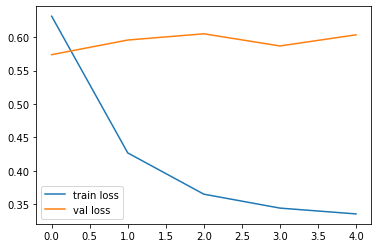

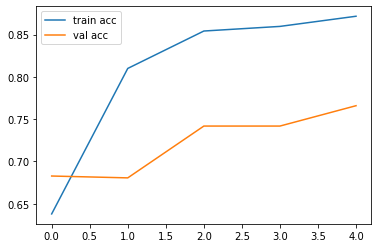

<Figure size 432x288 with 0 Axes>

In [45]:
# plot the loss
plt.plot(model_cnn.history['loss'], label='train loss')
plt.plot(model_cnn.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(model_cnn.history['accuracy'], label='train acc')
plt.plot(model_cnn.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# Load model from drive
model_path  = '/content/gdrive/My Drive/people_cnn.h5'

# Melihat Feature extraction dari Model CNN

In [43]:
def extract_feature(path):
  img = cv2.imread(path)
  img = cv2.resize(img,(128, 128))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = np.reshape(img, [1, 128, 128, 3])
  img = img / 255.0

  for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'pool' not in layer.name:
      continue

    redefine_model = keras.Model(inputs=model.inputs, outputs=model.layers[i].output)

    feature_maps = redefine_model.predict(img)
    square = 8;
    ix = 1
    plt.figure(figsize=(7,7))
    for _ in range(square):
      for _ in range(square):
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(feature_maps[0, :, :, ix-1], cmap = 'gray')
        ix += 1
    print(i, layer.name, layer.output.shape)
    plt.show()

1/1 [==============================] - 0s 79ms/step
1 max_pooling2d_19 (None, 32, 32, 64)


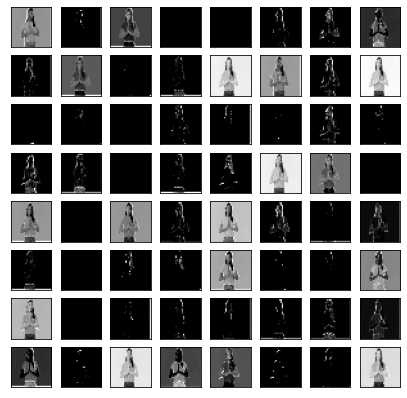

1/1 [==============================] - 0s 67ms/step
3 max_pooling2d_20 (None, 16, 16, 64)


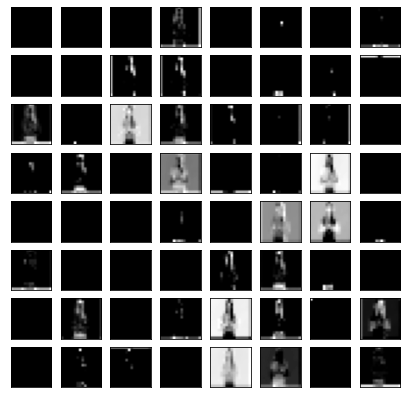

1/1 [==============================] - 0s 70ms/step
5 max_pooling2d_21 (None, 8, 8, 64)


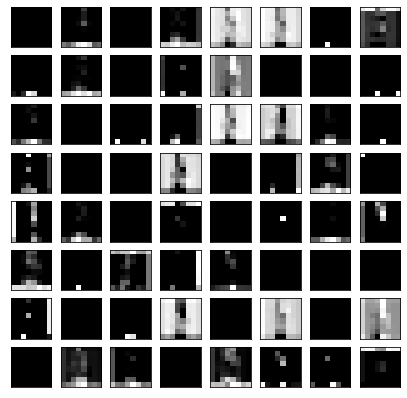

1/1 [==============================] - 0s 81ms/step
7 max_pooling2d_22 (None, 4, 4, 64)


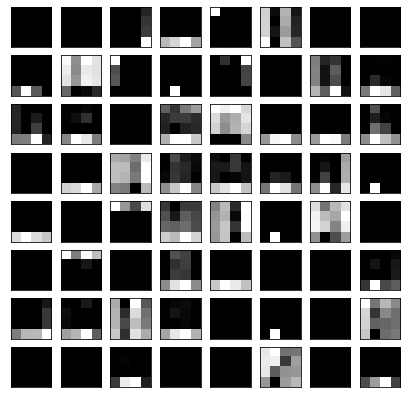

In [44]:
extract_feature('/content/gdrive/My Drive/predict_img/people.jpg')

In [3]:
cnn = load_model('/content/gdrive/My Drive/people_cnn.h5')

In [8]:
# import numpy as np
# from tensorflow.keras.preprocessing import image
# test_image = image.load_img('/content/gdrive/My Drive/resized/train/people/people1.jpg', target_size = (128,128))
# test_image = image.img_to_array(test_image)
# test_image=test_image/255
# test_image = np.expand_dims(test_image, axis = 0)
# result = model.predict(test_image)

1/1 [==============================] - 0s 159ms/step


# Prediksi Gambar menggunakan Model CNN yang sudah dibuat

1/1 [==============================] - 0s 15ms/step


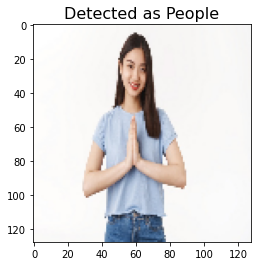

In [49]:
import cv2
import matplotlib.pyplot as plt
test_img = cv2.imread('/content/gdrive/My Drive/predict_img/people.jpg')
test_img = cv2.resize(test_img, (128, 128))
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
test_input = test_img.reshape((1, 128, 128,3))
result = model.predict(test_input)
if(result == 1.0):
  plt.title(label="Detected as People", fontsize=16)
elif(result == 0):
  plt.title(label="Detected as Vehicle", fontsize=16)
plt.imshow(test_img)

1/1 [==============================] - 0s 15ms/step


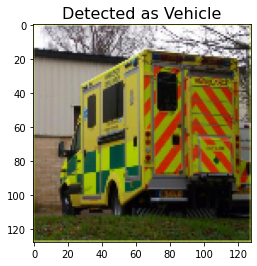

In [50]:
import cv2
import matplotlib.pyplot as plt
test_img = cv2.imread('/content/gdrive/My Drive/predict_img/truk.jpg')
test_img = cv2.resize(test_img, (128, 128))
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
test_input = test_img.reshape((1, 128, 128,3))
result = model.predict(test_input)
if(result == 1.0):
  plt.title(label="Detected as People", fontsize=16)
elif(result == 0):
  plt.title(label="Detected as Vehicle", fontsize=16)
plt.imshow(test_img)